# Spatially varying smoothness: test cases

These test cases for spatially varying smootness are those of [Donoho and Johnstone (1994)](http://biomet.oxfordjournals.org/content/81/3/425.short).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(12348)
savedata = True

In [3]:
N = 2048
Nobs = 128
taxis = np.linspace(0, 1, N)
tobs = np.linspace(0, 1, Nobs)
SNR = 7

In [4]:
def make_data(f, taxis, tobs, SNR):
    y = f(taxis)
    sd = np.std(y)
    obs = f(tobs) + (sd / SNR) * np.random.randn(Nobs)
    
    return y, obs

In [5]:
def plot_data(f):
    plt.figure(figsize=(12, 8))
    y, obs = make_data(f, taxis, tobs, SNR)
    plt.plot(taxis, y)
    plt.scatter(tobs, obs, zorder=3)
    plt.xlim(0, 1)
    
    return y, obs

In [6]:
def save_data(y, obs, fname):
    datadir = 'data'
    sampled = np.vstack([tobs, obs]).T
    actual = np.vstack([taxis, y]).T
    
    fstub = datadir + '/' + fname
    np.savetxt(fstub + '_sampled.csv', sampled, delimiter=',')
    np.savetxt(fstub + '_actual.csv', actual, delimiter=',')

## Blocks

In [7]:
def K_blocks(t):
    return (1 + np.sign(t))/2

In [8]:
def f_blocks(t):
    tt = np.array([0.1, 0.13, 0.15, 0.23, 0.25, 0.40, 0.44, 0.65, 0.76, 0.78, 0.81])
    h = np.array([4, -5, 3, -4, 5, -4.2, 2.1, 4.3, -3.1, 2.1, -4.2])
    tmat = np.array(t).reshape(1, -1) - tt.reshape(-1, 1)
    return h.dot(K_blocks(tmat))

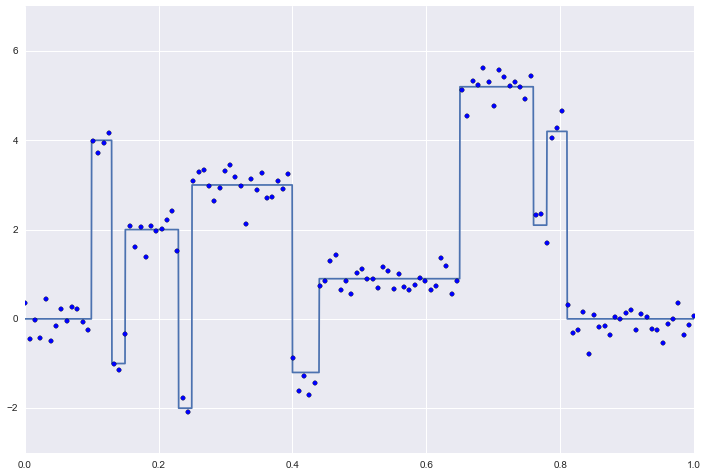

In [9]:
y, obs = plot_data(f_blocks)

In [10]:
if savedata:
    save_data(y, obs, 'blocks')

## Bumps

In [11]:
def K_bumps(t):
    return (1 + np.abs(t)) ** -4

In [12]:
def f_bumps(t):
    tt = np.array([0.1, 0.13, 0.15, 0.23, 0.25, 0.40, 0.44, 0.65, 0.76, 0.78, 0.81])
    h = np.array([4, 5, 3, 4, 5, 4.2, 2.1, 4.3, 3.1, 5.1, 4.2])
    w = np.array([0.005, 0.005, 0.006, 0.01, 0.01, 0.03, 0.01, 0.01, 0.005, 0.008, 0.005])
    tmat = (np.array(t).reshape(1, -1) - tt.reshape(-1, 1)) / w[:, np.newaxis]
    return h.dot(K_bumps(tmat))

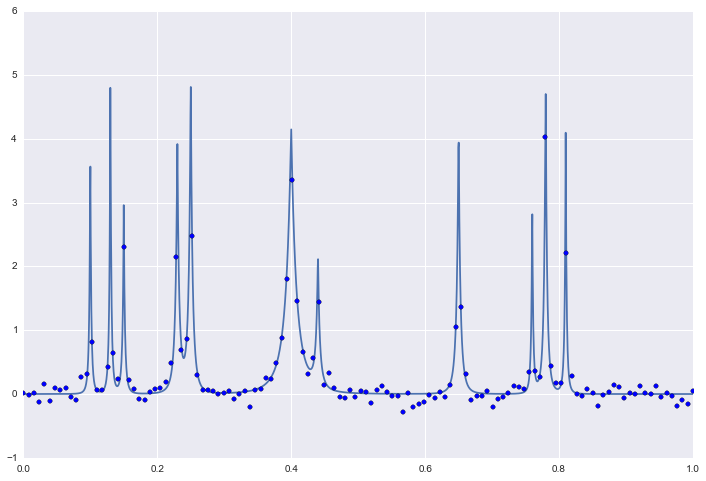

In [13]:
y, obs = plot_data(f_bumps)

In [14]:
if savedata:
    save_data(y, obs, 'bumps')

# HeaviSine

In [15]:
def f_heavisine(t):
    return 4 * np.sin(4 * np.pi * t) - np.sign(t - 0.3) - np.sign(0.72 - t)

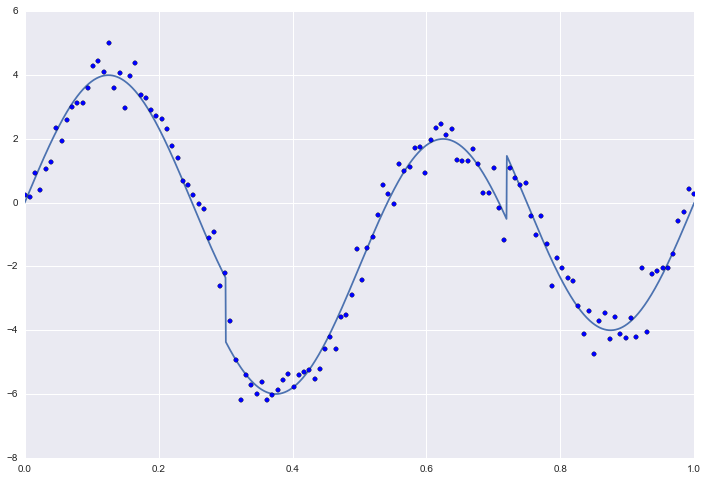

In [16]:
y, obs = plot_data(f_heavisine)

In [17]:
if savedata:
    save_data(y, obs, 'heavisine')

# Doppler

In [18]:
def f_doppler(t):
    eps = 0.05
    f = np.sqrt(t * (1 - t))
    f *= np.sin((2 * np.pi * (1 + eps)) / (t + eps))
    return f

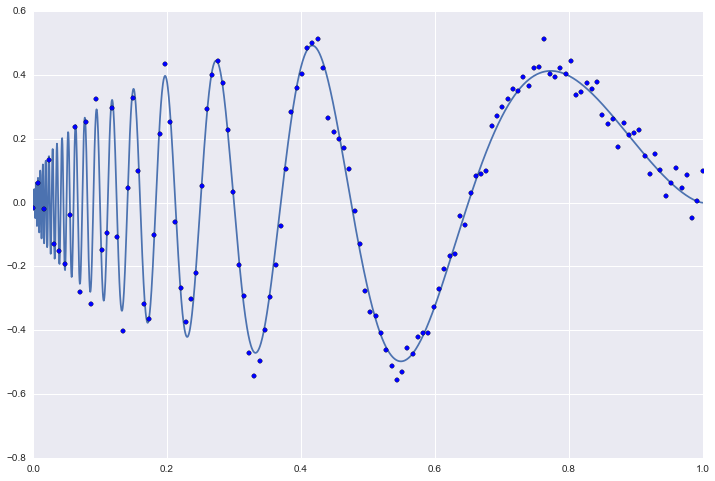

In [19]:
y, obs = plot_data(f_doppler)

In [20]:
if savedata:
    save_data(y, obs, 'doppler')